In [11]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import squidpy as sq
import numpy as np

from PIL import Image
import networkx as nx
import matplotlib.cm as cmx
import matplotlib.colors as colors

import ncem

usr = !echo $USER
base_path = '.'
base_path_out = '.'

grid_search_dir = '.'
datadir = '.'
targetpath = '.'
configpath = '.'
outdir = base_path_out + '/results/'
figdir = outdir+'/figures/'

sc.logging.print_version_and_date()
sc.settings.verbosity = 0
sc.settings.figdir = figdir


# remove later
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Scanpy 1.7.2, on 2021-06-28 14:45.


# Load data

In [12]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='pascualreguant',
    data_path=dir_data + 'pascualreguant/',
    radius=60,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata


/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:1570: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  nuclei_df = read_excel(self.data_path + metadata["fn"][0])
/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:1571: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  membranes_df = read_excel(self.data_path + metadata["fn"][1])
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1

collecting image-wise celldata
adding graph-level covariates
Loaded 1 images with complete data from 1 patients over 6991 cells with 51 cell features and 9 distinct celltypes.
Mean of mean node degree per images across images: 19.083107

 Celldata metadata: {'lateral_resolution': 0.325, 'fn': ['TONSIL_MFI_nuclei_data_table.xlsx', 'TONSIL_MFI_membranes_data_table.xlsx'], 'image_col': 'img_keys', 'pos_cols': ['Location_Center_X', 'Location_Center_Y'], 'cluster_col': 'cell_class', 'cluster_col_preprocessed': 'cell_class_preprocessed', 'patient_col': None}


# Supp. Fig. 1: Cell-type centric summary statistics per data set. 

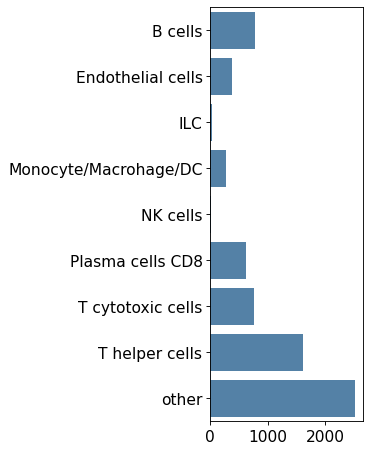

In [14]:
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 6))
sns.barplot(
    y=interpreter.data.celldata.obs.cell_class_preprocessed.value_counts().index,
    x=list(interpreter.data.celldata.obs.cell_class_preprocessed.value_counts()),
    color='steelblue',
    ax=ax
)
ax.grid(False)
#ax.set_yticks([])
plt.tight_layout()
plt.show()

0.0
1.1235874696037762
5.451437562580461
20.08310685166643
77.70404806179373
321.3106851666428
1165.782720640824
6991.0


/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:105: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=10)


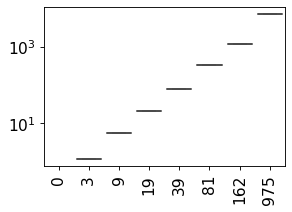

In [13]:
plt.rcParams.update({'font.size': 18})
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 12, 30, 60, 120, 250, 500, 3000],
    lateral_resolution=0.325,
)

# Supp. Fig. 2: Variance decomposition in spatial omics data sets.

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


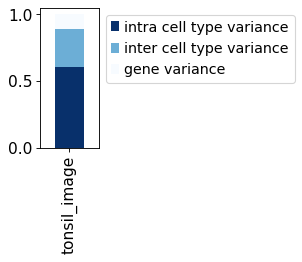

In [3]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='other')
interpreter.data.variance_decomposition(
    var_decomp, 
    panel_width=4,
)

In [4]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.603555
inter cell type variance    0.287348
gene variance               0.109097
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


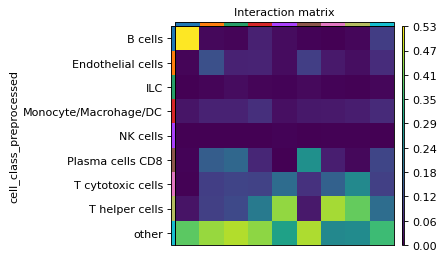

In [5]:
interpreter.data.celldata_interaction_matrix(
    figsize=(3,3),
    fontsize=10
)

# Supp. Fig. 7: Ligand–receptor permutation test. 

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


n cells: 4470


  0%|          | 0/1000 [00:00<?, ?permutation/s]

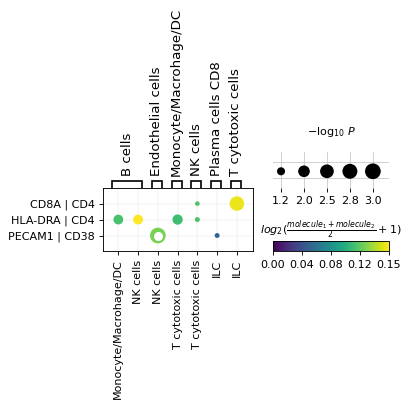

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
hgnc_names = [
    'BCL6', 
    'FOXP3', 
    'IKZF2', 
    'IRF4', 
    'MKI67', 
    'PAX5', 
    'CCR6', 
    'ITGAE',
    'ITGAX', 
    'IL3RA', 
    'IL7R', 
    'SDC1', 
    'CD14', 
    'THBD', 
    'FCGR3A', 
    'KLRB1',
    'CD19', 
    'MS4A1', 
    'CR2', 
    'FCER2', 
    'CD247', 
    'PECAM1', 
    'CD34', 
    'CD38', 
    'CD4',
    'PTPRC', 
    'PTPRC', 
    'PTPRC', 
    'ITGA1', 
    'NCAM1', 
    'CD69', 
    'CD7', 
    'CD8A',
    'KLRD1', 
    'CXCR3', 
    'FCER1A', 
    'GZMA', 
    'HLA-DRA', 
    'ICOS', 
    'CD79A', 
    'IGHG1',
    'IGHM', 
    'CD207', 
    'NCR2', 
    'TNFSF11', 
    'SMN1', 
    'TCRVa72', ## 
    'TRG', 
    'VCAM1',
    'VIM', 
    'KIT'
]
adata = interpreter.data.ligrec(
    hgnc_names=hgnc_names,
    undefined_type='other',
    fontsize=12,
    width=2.,
)

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

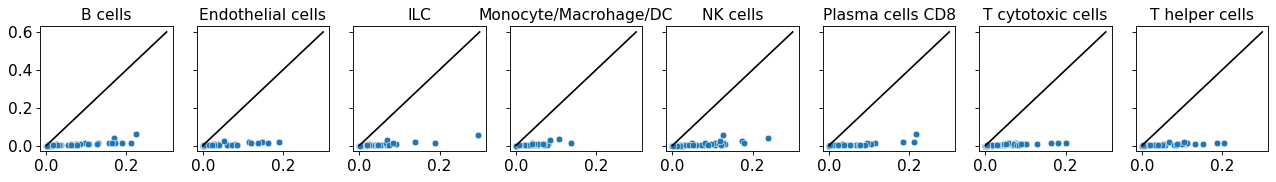

(None,)

In [10]:
interpreter.data.noise_structure(
    undefined_type='other',
    min_x=0.0, max_x=0.3,
    panel_height=2.5,
    fontsize=14
),